In [22]:
import guidance
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../data/final_version_withtext_cleaned.csv', index_col=0)
df.head()

,pdf_link,summary,text_extracted,text_extracted_len,summary_len
0,https://www.sec.gov//litigation/complaints/200...,CORRECTEDThe Securities and Exchange Commissio...,1 | MARC J. FAGEL (Cal. Bar No. 154425) CARY S...,2125,392
1,https://www.sec.gov//litigation/complaints/200...,The United States Securities and Exchange Comm...,1 of 10 \nCase 9:08-cv-81565-DTKH Document 1 E...,3169,621
2,https://www.sec.gov//litigation/complaints/200...,The Securities and Exchange Commission announc...,Case 3:08-cv-00438-B Document 164 Filed 12/22/...,11146,483
3,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE TE...,2433,459
4,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE MI...,7015,494


## Extracted Text Length

<Axes: ylabel='Frequency'>

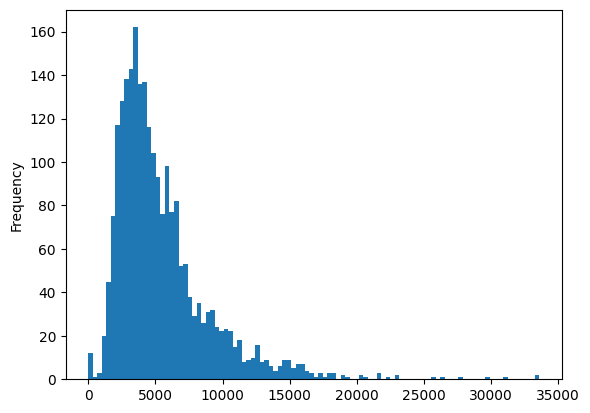

In [24]:
df['text_extracted_len'].plot.hist(bins=100)

In [25]:
df['text_extracted_len'].describe()

count     2333.000000
mean      5478.870553
std       3594.251125
min          1.000000
25%       3117.000000
50%       4510.000000
75%       6664.000000
max      33588.000000
Name: text_extracted_len, dtype: float64

## Summary Text length

<Axes: ylabel='Frequency'>

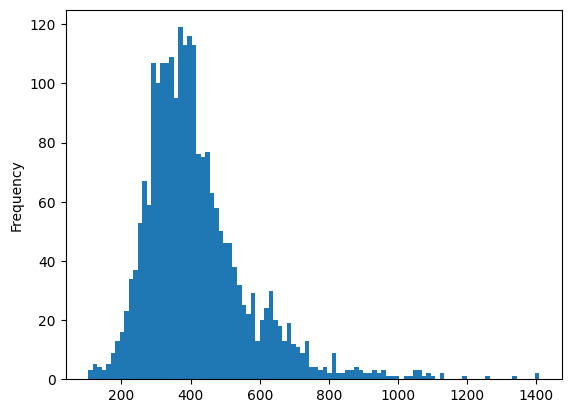

In [26]:
df['summary_len'].plot.hist(bins=100)

In [27]:
df['summary_len'].describe()

count    2333.000000
mean      417.513073
std       152.230772
min       104.000000
25%       319.000000
50%       388.000000
75%       479.000000
max      1408.000000
Name: summary_len, dtype: float64

In [29]:
df.drop_duplicates(subset=['text_extracted'], inplace=True)
df.shape


(2293, 5)

## Get number of sentences

In [30]:
df['summary_sentences_len'] = df[df['summary'].notnull()]['summary'].apply(lambda x: x.split('.').__len__())
df = df.reset_index(drop=True)
df['text_extracted_sentences_len'] = df[df['text_extracted'].notnull()]['text_extracted'].apply(lambda x: x.split('.').__len__())
df.head()

,pdf_link,summary,text_extracted,text_extracted_len,summary_len,summary_sentences_len,text_extracted_sentences_len
0,https://www.sec.gov//litigation/complaints/200...,CORRECTEDThe Securities and Exchange Commissio...,1 | MARC J. FAGEL (Cal. Bar No. 154425) CARY S...,2125,392,20,201.0
1,https://www.sec.gov//litigation/complaints/200...,The United States Securities and Exchange Comm...,1 of 10 \nCase 9:08-cv-81565-DTKH Document 1 E...,3169,621,37,218.0
2,https://www.sec.gov//litigation/complaints/200...,The Securities and Exchange Commission announc...,Case 3:08-cv-00438-B Document 164 Filed 12/22/...,11146,483,38,1034.0
3,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE TE...,2433,459,19,193.0
4,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE MI...,7015,494,22,491.0


In [31]:
df.shape

(2293, 7)

## Summary Sentence Length

<Axes: ylabel='Frequency'>

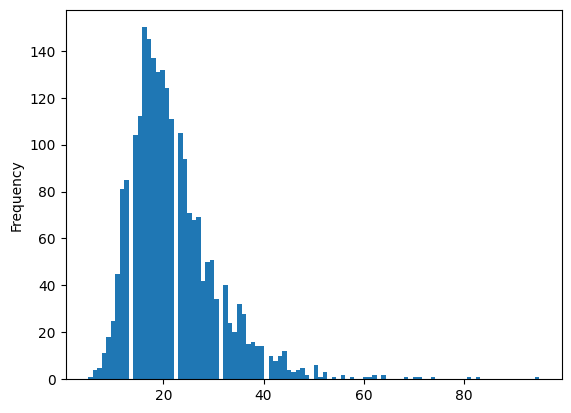

In [32]:
df['summary_sentences_len'].plot.hist(bins=100)

In [33]:
df['summary_sentences_len'].describe()

count    2293.000000
mean       21.983428
std         8.870293
min         5.000000
25%        16.000000
50%        20.000000
75%        26.000000
max        95.000000
Name: summary_sentences_len, dtype: float64

## Extracted Sentence Length

<Axes: ylabel='Frequency'>

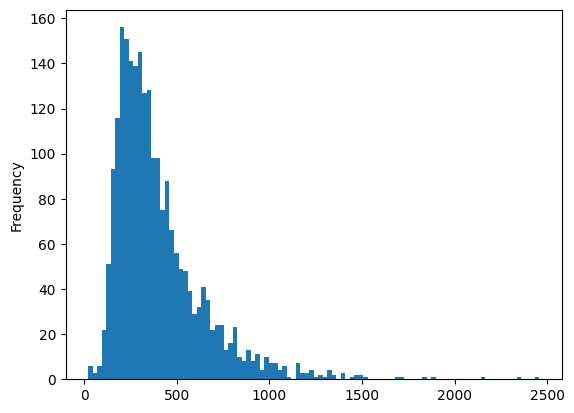

In [34]:
df['text_extracted_sentences_len'].plot.hist(bins=100)

## Filter by number of Summary Sentences (<=40)

In [35]:
# drop summary sentences more than 40
df = df[df['summary_sentences_len'] <= 40]
df = df.reset_index(drop=True)
df.head()

,pdf_link,summary,text_extracted,text_extracted_len,summary_len,summary_sentences_len,text_extracted_sentences_len
0,https://www.sec.gov//litigation/complaints/200...,CORRECTEDThe Securities and Exchange Commissio...,1 | MARC J. FAGEL (Cal. Bar No. 154425) CARY S...,2125,392,20,201.0
1,https://www.sec.gov//litigation/complaints/200...,The United States Securities and Exchange Comm...,1 of 10 \nCase 9:08-cv-81565-DTKH Document 1 E...,3169,621,37,218.0
2,https://www.sec.gov//litigation/complaints/200...,The Securities and Exchange Commission announc...,Case 3:08-cv-00438-B Document 164 Filed 12/22/...,11146,483,38,1034.0
3,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE TE...,2433,459,19,193.0
4,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE MI...,7015,494,22,491.0


In [36]:
df.shape

(2208, 7)

<Axes: ylabel='Frequency'>

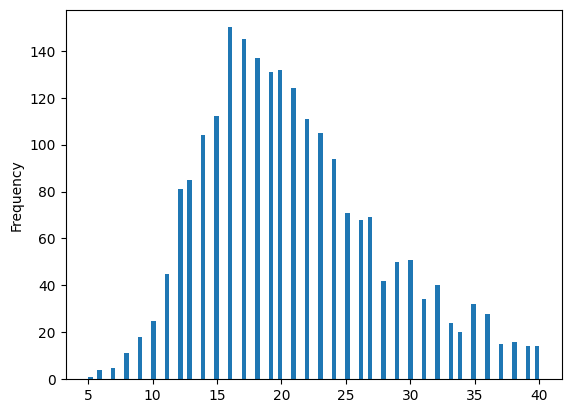

In [37]:
df['summary_sentences_len'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

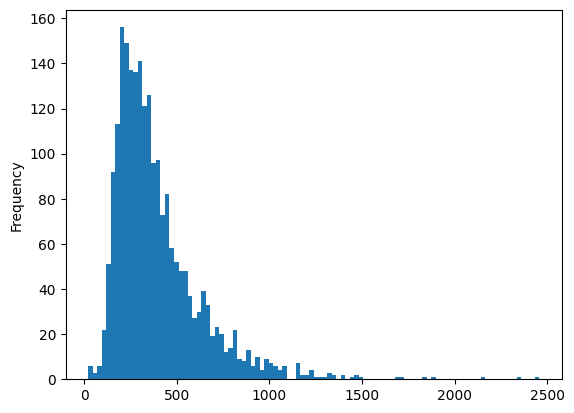

In [38]:
df['text_extracted_sentences_len'].plot.hist(bins=100)

## Filter by number of Extracted Sentences (<=1000)

In [39]:
# drop text_extracted sentences more than 1000
df = df[df['text_extracted_sentences_len'] <= 1000]
df = df.reset_index(drop=True)
df.head()

,pdf_link,summary,text_extracted,text_extracted_len,summary_len,summary_sentences_len,text_extracted_sentences_len
0,https://www.sec.gov//litigation/complaints/200...,CORRECTEDThe Securities and Exchange Commissio...,1 | MARC J. FAGEL (Cal. Bar No. 154425) CARY S...,2125,392,20,201.0
1,https://www.sec.gov//litigation/complaints/200...,The United States Securities and Exchange Comm...,1 of 10 \nCase 9:08-cv-81565-DTKH Document 1 E...,3169,621,37,218.0
2,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE TE...,2433,459,19,193.0
3,https://www.sec.gov//litigation/complaints/200...,"The Securities and Exchange Commission (""Commi...",IN THE UNITED STATES DISTRICT COURT FOR THE MI...,7015,494,22,491.0
4,https://www.sec.gov//litigation/complaints/200...,The Securities and Exchange Commission today f...,10f6 \n08-61524-CIV-DIMITROULEAS/ROSENBAUM \nU...,1270,356,16,107.0


<Axes: ylabel='Frequency'>

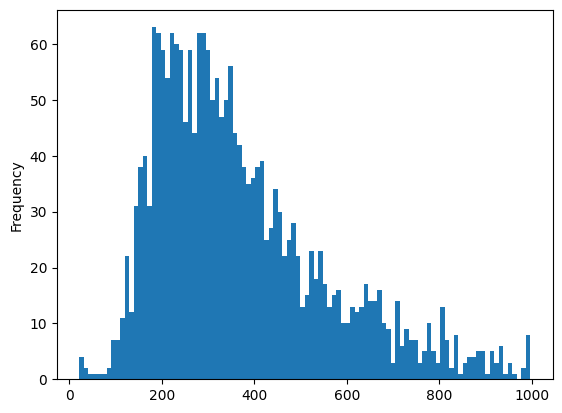

In [40]:
df['text_extracted_sentences_len'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

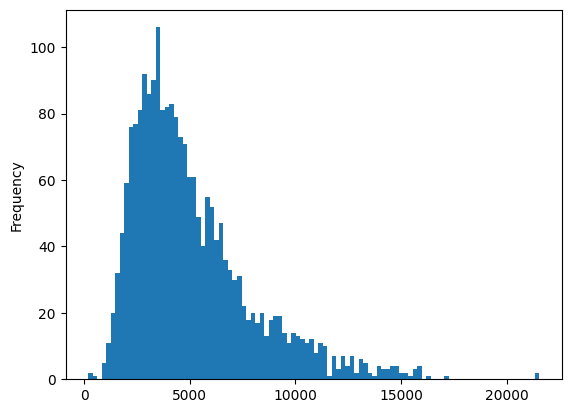

In [41]:
df['text_extracted_len'].plot.hist(bins=100)

In [42]:
df.to_csv('../data/filtered_data.csv')

In [43]:
df.shape

(2149, 7)